# Forecast KwH as a dependent Variable of weather, season (time of day, date of month) and degree day

## Previous Approach
  1st Simple technique is to forecast weather and then make a simple OLS or Linear Regression of kwh based on weather alone. That method doesn't work well with the volatility of weather, since we don't _*STORE*_  dependent variables of temperature data. 
 
## Data reading and basic correlation analysis
In this notebook, we will try to get the predictions of kwh directly with variables that makes sense, viz
  1. Temperature that day.
  2. Degree Day that day.
  3. Day
  4. Month
  5. Weekday vs Weekend (You will see that day doesn't have a great impact on metric correlation)
  6. Week # in Year
  7. Week # in month
  
Start with these variables. Prune unwanted variables after the correlation matrix is available. A direct correlation is misleading since kwh is the energy consumed in the previous hour and temperature and other details are specific to that hour. So we will also correlate the data with kwh field shifted up to see if they make sense. We are interested in the DELTAS (i.e. CHANGE in values). So a correlation matrix of temperature and metric change is also checked. The remaining parameters are absolute values.

datetime64[ns]
Index(['temperature', 'metric', 'hdd', 'cdd', 'day', 'hour'], dtype='object')


,temperature,metric,hdd,cdd,day,hour
date,,,,,,
2017-06-01 00:00:00,20.400000,16.0,NaN,NaN,152,0
2017-06-01 01:00:00,19.900000,15.0,NaN,NaN,152,1
2017-06-01 02:00:00,19.400000,14.0,NaN,NaN,152,2
2017-06-01 03:00:00,19.300000,10.0,NaN,NaN,152,3
2017-06-01 04:00:00,19.400000,16.0,NaN,NaN,152,4
2017-06-01 05:00:00,18.900000,12.0,NaN,NaN,152,5
2017-06-01 06:00:00,19.900000,17.0,NaN,NaN,152,6
2017-06-01 07:00:00,22.900000,17.0,NaN,NaN,152,7
2017-06-01 08:00:00,24.900000,17.0,NaN,NaN,152,8


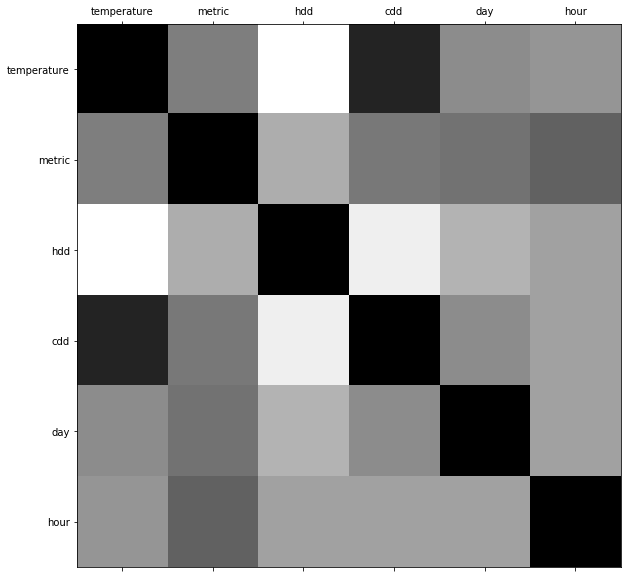

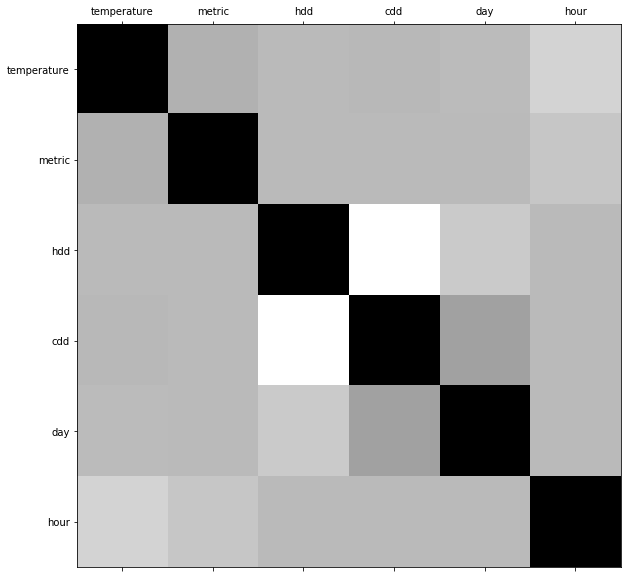

In [1]:
import pandas as pd, numpy as np, pyflux as pf
import matplotlib.pyplot as plt
% matplotlib inline
from datetime import datetime, timedelta

epoch = datetime.utcfromtimestamp(0)

DEVICE_ID = 20
def get_df(filename):
    df = pd.read_csv(filename)
    df.date = pd.to_datetime(df.date)
    df.device_id = df.device_id.apply(int)
    df = df[df.device_id == DEVICE_ID]
    df = df.sort_values(by='date')
    df = df.set_index('date')
    del df['id']
    return df

wdf = get_df("./weather.csv")
kdf = get_df("./kwh.csv")
dddf = get_df("./degreeday.csv")

df = pd.concat([wdf, kdf, dddf], axis = 1)
del df['device_id']

df = df.resample("60T").asfreq()
df['temperature'] = df['temperature'].interpolate()
df['metric'] = df['metric'].interpolate()
df['hdd'] = df['hdd'].interpolate()
df['cdd'] = df['cdd'].interpolate()

print(df.index.dtype)

df['day'] = df.index.dayofyear
df['hour'] = df.index.hour

def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr, cmap = "Greys", interpolation = "nearest")
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

print(df.columns)
plot_corr(df)

df1 = df.copy()
df1.metric = df1.metric - df1.metric.shift(1)
df1.temperature = df1.temperature - df1.temperature.shift(1)
df1 = df1.iloc[1:]
plot_corr(df1)

del df1, wdf, kdf, dddf

df = df[df.index>='2017-06-01']
df = df[df.index < '2018-06-01']
df

## Exploratory Analysis

Settling for difference in kwh per hour, at the end of hour and the independent variables (weather, degreeday(TODO) and a couple of other variables as well), let's plot the absolute values. This part gives a general idea wrt to average kwh values for a selected variable. 

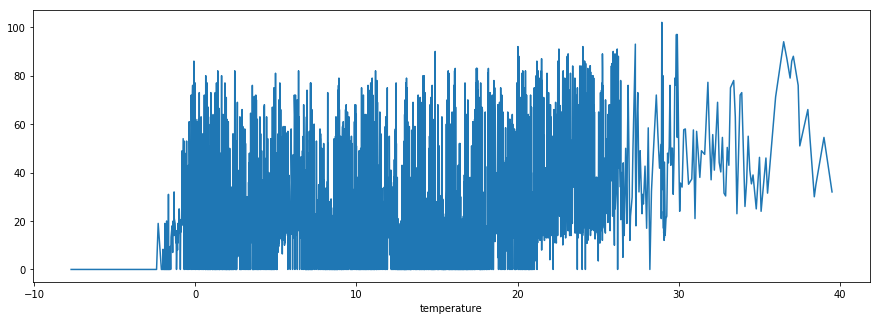

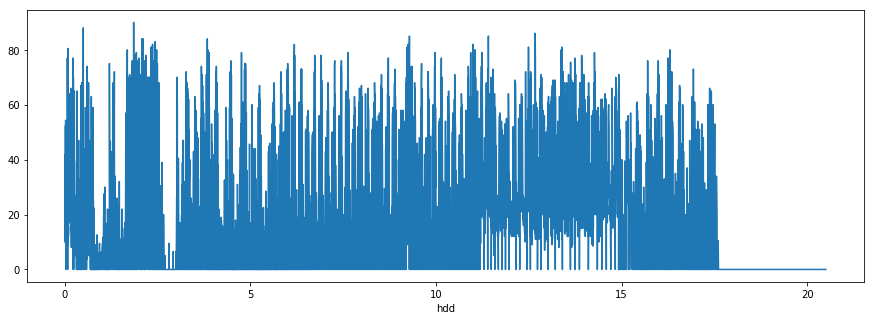

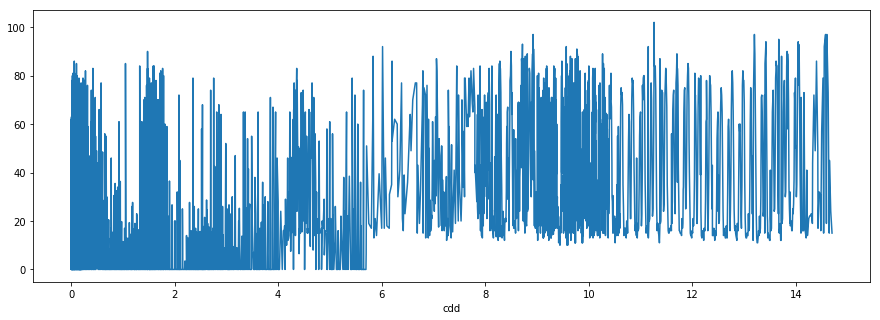

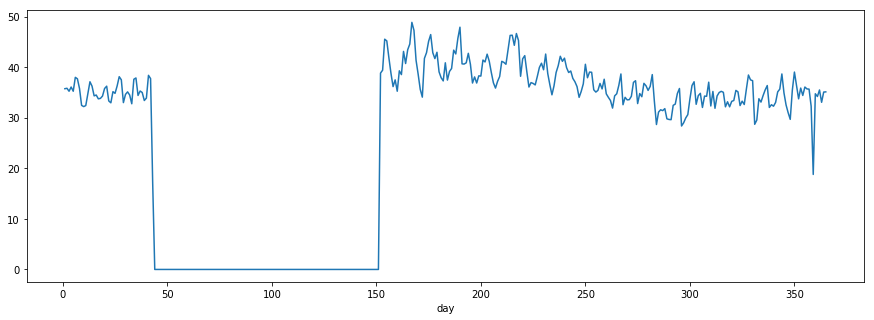

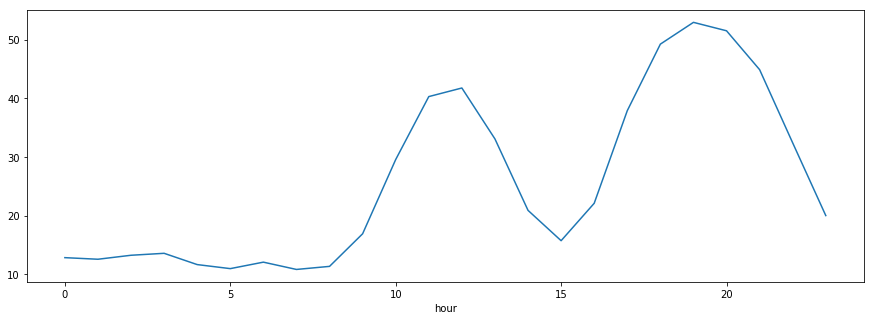

In [2]:
plt.figure(figsize = (15, 5))
df.groupby('temperature')['metric'].mean().plot()
plt.figure(figsize = (15, 5))
df.groupby('hdd')['metric'].mean().plot()
plt.figure(figsize = (15, 5))
df.groupby('cdd')['metric'].mean().plot()
plt.figure(figsize = (15, 5))
df.groupby('day')['metric'].mean().plot()
plt.figure(figsize = (15, 5))
df.groupby('hour')['metric'].mean().plot()

Detailed breakdown. From the graphs, for Device 1:
* "Day" only seems to add noise and doesn't provide much useful info. 
* Temperature increase steadily increases kwh
* In the middle months, the energy consumption is higher than the last and first 2 months (Could be Holidays season and winter, since less temperature pulls less metric from the above inference)
* The hour is interesting. It has two peaks, one each in the morning and evening
* Heating Day values affect the kwhh values negative-exponentially. A mild increase in the heating degree-day values decreases energy consumption exponentially and vice versa.

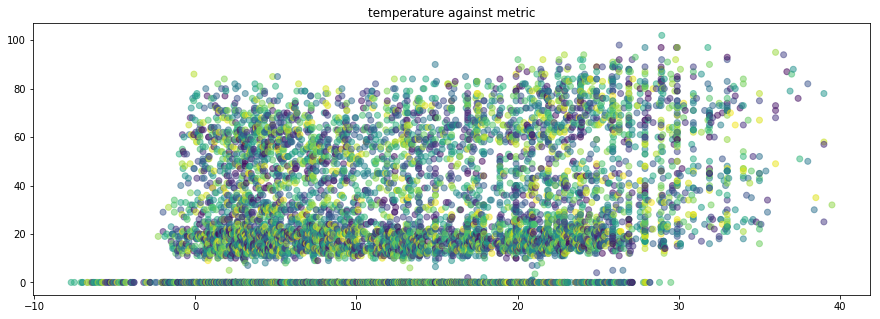

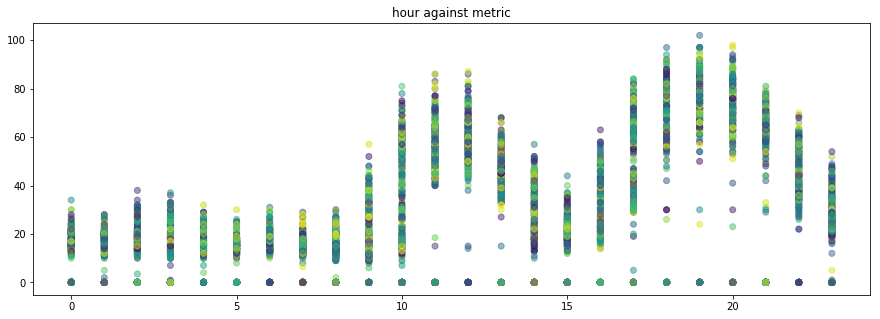

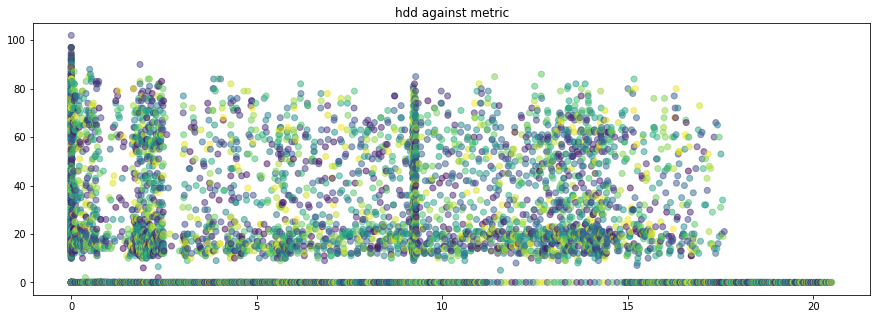

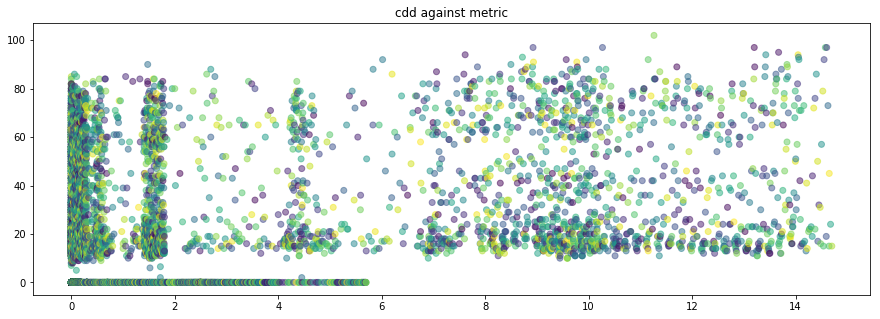

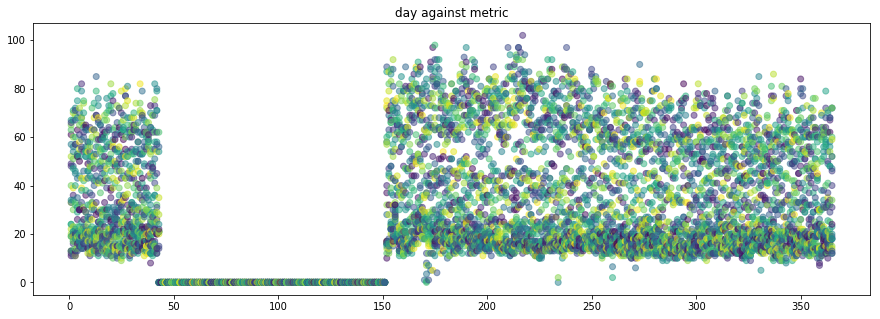

In [3]:
def plot_groupings(df, col, value = 'metric'):
    deldf = df.copy()
    deldf = deldf.sort_values(col)
    x = deldf[col].values
    y = deldf[value].values
    N = deldf.shape[0]
    colors = np.random.rand(N)
    plt.figure(figsize = (15, 5))
    plt.title("{} against {}".format(col, value))
    plt.scatter(x, y, c = colors, alpha=0.5)
    plt.show()


plot_groupings(df, 'temperature')
plot_groupings(df, 'hour')
plot_groupings(df, 'hdd')
plot_groupings(df, 'cdd')
plot_groupings(df, 'day')

The metric looks same irrespective of weekdays or weekend. TODO: THIS NEEDS TO BE determined dynamically and fed as a variable when building a model across devices. 

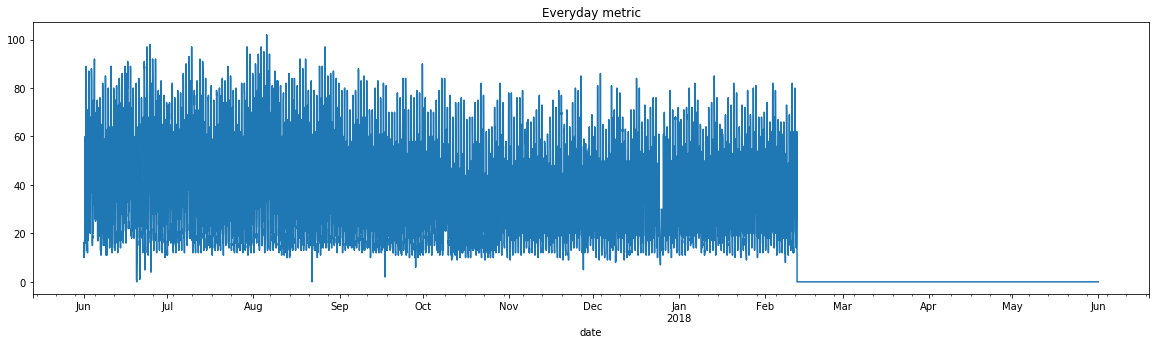

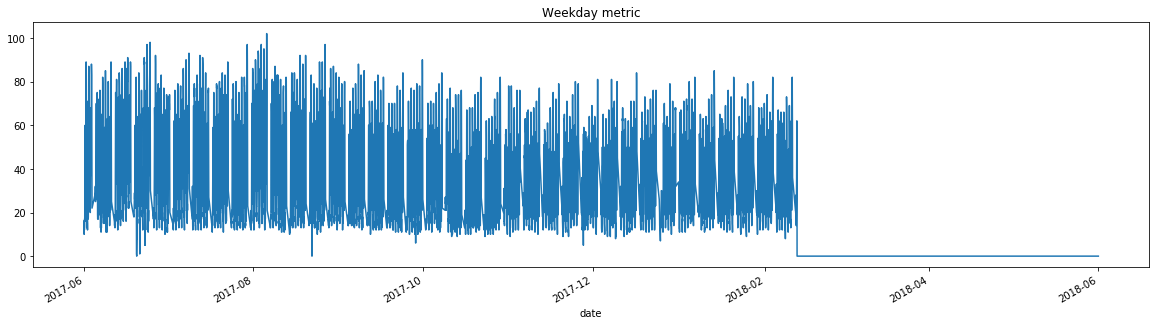

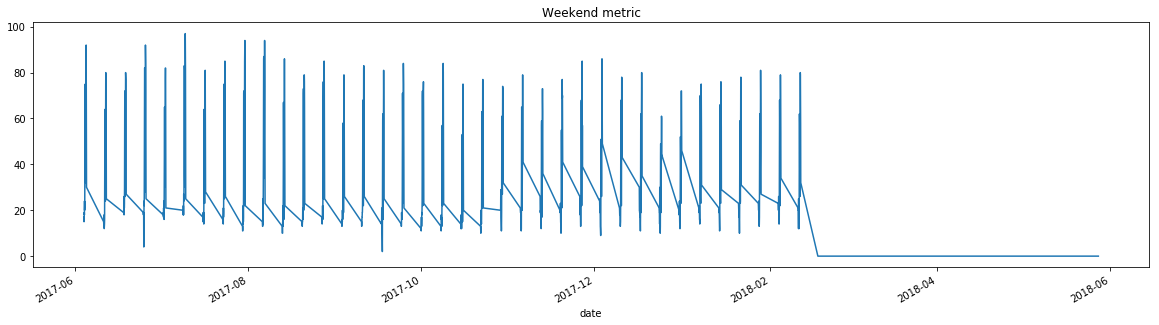

In [4]:
plt.figure(figsize = (20, 5))
plt.title("Everyday metric")
df.metric.plot()

plt.figure(figsize = (20, 5))
plt.title("Weekday metric")
df[df.index.weekday <=5].metric.plot()

plt.figure(figsize = (20, 5))
plt.title("Weekend metric")
df[df.index.weekday > 5].metric.plot()

Histograms to determine anomalies and patterns.

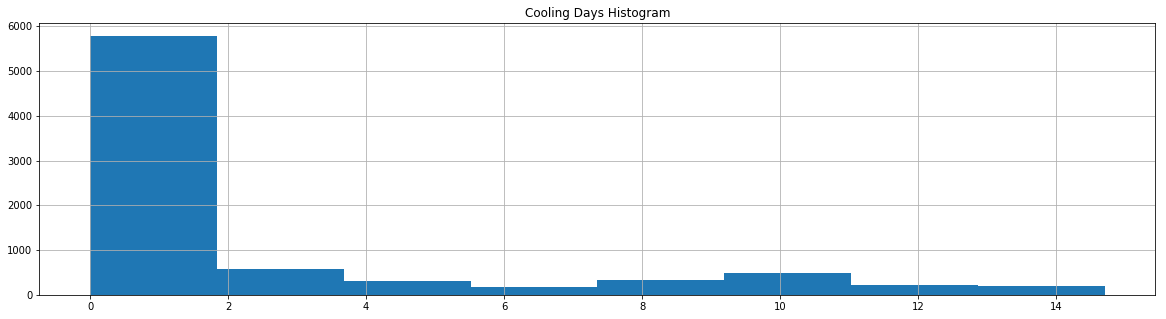

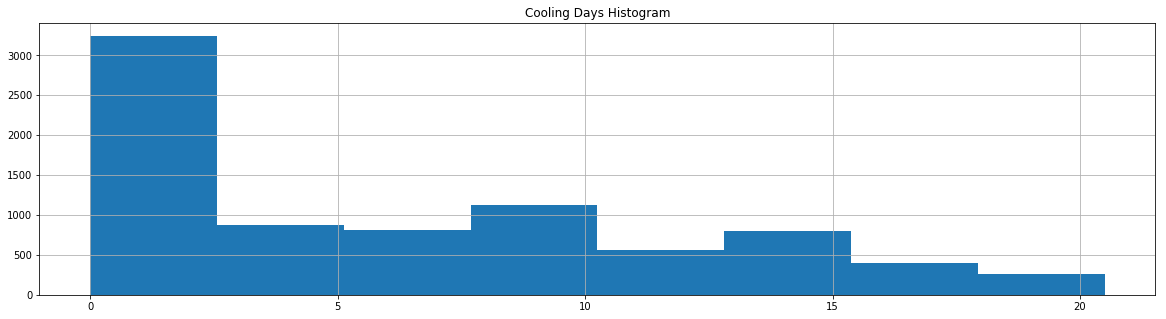

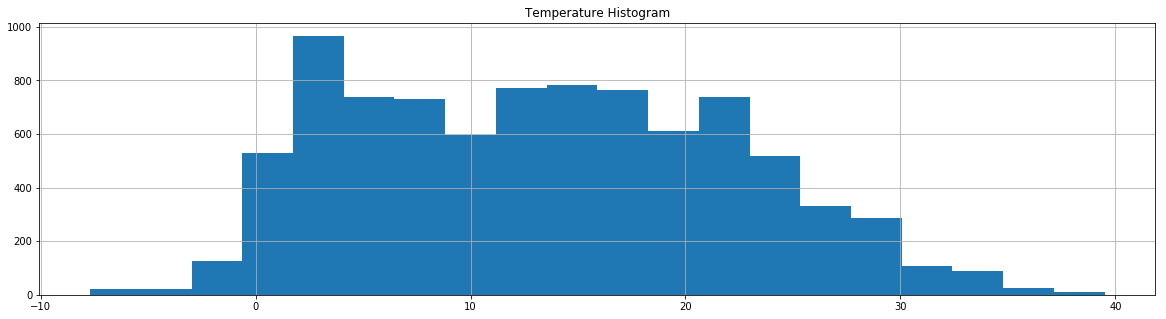

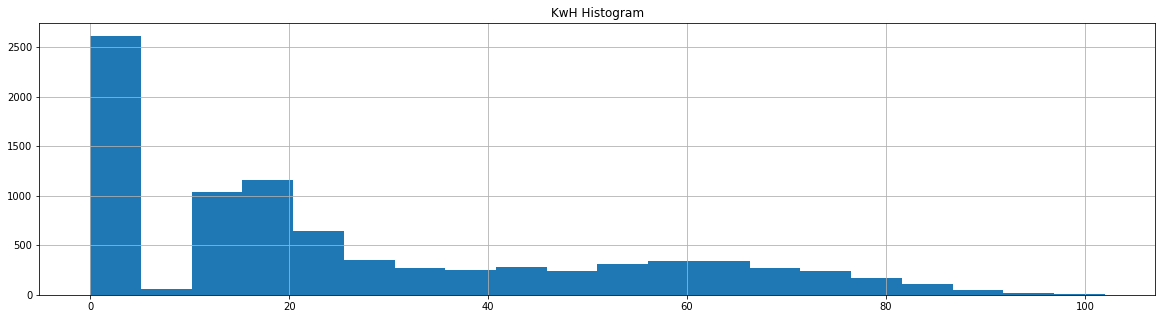

In [5]:
plt.figure(figsize = (20, 5))
plt.title("Cooling Days Histogram")
hist = df['cdd'].hist(bins = 8)
plt.figure(figsize = (20, 5))
plt.title("Cooling Days Histogram")
hist = df['hdd'].hist(bins = 8)
plt.figure(figsize = (20, 5))
plt.title("Temperature Histogram")
hist = df['temperature'].hist(bins = 20)
plt.figure(figsize = (20, 5))
plt.title("KwH Histogram")
hist = df['metric'].hist(bins = 20)

In [6]:
print("Final set of variables = ", df.columns)
df.to_csv("./pruned_data_{}.csv".format(DEVICE_ID))

Final set of variables =  Index(['temperature', 'metric', 'hdd', 'cdd', 'day', 'hour'], dtype='object')
